# 1 Linear Regression
## 1.1 Plot the data

In [41]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt


In [42]:
d = {'x': [1, 3, 6, 8], 'y': [1, 6, 7, 5]}
df = pd.DataFrame(data=d)


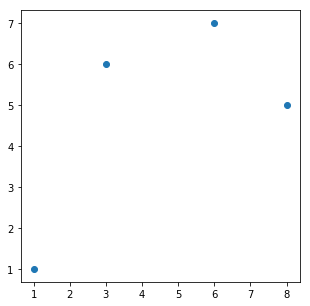

In [45]:
plt.figure(figsize = (5, 5))

df['x2'] = df['x']**2
plt.scatter(df['x'], df['y'])
plt.show()

## 1.2 Linear Regression

In [61]:
est = sm.OLS(df['y'], df['x']).fit()
param = est.params
t = est.tvalues
print("regression coefficients")
print(param)
print("t-value")
print(t)
print(est.summary())
print()
est2 = sm.OLS(df['y'], df[['x', 'x2']]).fit()
param2 = est2.params
t2 = est2.tvalues
print("regression coefficients")
print(param2)
print("t-value")
print(t2)
print(est2.summary())


regression coefficients
x    0.918182
dtype: float64
t-value
x    3.902941
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     15.23
Date:                Wed, 21 Feb 2018   Prob (F-statistic):             0.0299
Time:                        22:33:11   Log-Likelihood:                -8.7130
No. Observations:                   4   AIC:                             19.43
Df Residuals:                       3   BIC:                             18.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/anaconda/envs/python3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


### Coment the regression lines: which one do you think is more reasonable to pick?

In Linear Regression, p-value is less than 0.05 for x. Thus, x is statistically significant. H

In Multiple Linear Regression, p-value is less than 0.05 for x. Thus, x is also statistically significant. However, p-value is greater than 0.05 for x^2, so it x^2 not statistically significant. 

Multiple Linear Regression has higher r squared value than Linear Regression, so Multiple Linear Regression is more reasonable to pick.

# 2 Loss Function
## 2.1 Plot the loss function

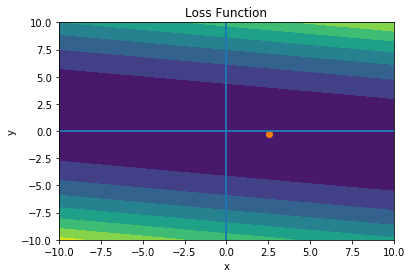

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))    

def loss(b1, b2):
    return ((df['y'] - (b1 * df['x'] + b2 * (df['x2'])))**2).sum()

d = np.empty_like(yy)

for i in range(100):
    for j in range(100):
        d[i, j] = loss(xx[i, j], yy[i, j])
        
plt.contourf(xx, yy, d)
plt.axvline(x=0)
plt.axhline(y=0)
plt.scatter(param2[0], param2[1])
plt.title('Loss Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 3 L1 Regularization
## 3.1 Regularization penalty

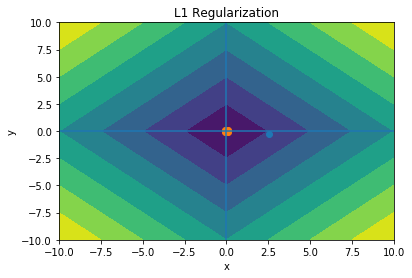

In [78]:
d = np.empty_like(yy)

for i in range(100):
    for j in range(100):
        d[i, j] = reg(xx[i, j], yy[i, j])

def reg(b1, b2):
    return abs(b1) + abs(b2)
        
plt.contourf(xx, yy, d)
plt.axvline(x=0)
plt.axhline(y=0)
plt.scatter(param2[0], param2[1])
plt.scatter(xx[np.where(d==d.min())], yy[np.where(d==d.min())])
plt.title('L1 Regularization')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Where is the smallest penalty value on this figure?
Smallest panelty value on this figure is in the middle.

# 4 Lasso Regression

lambda value
1


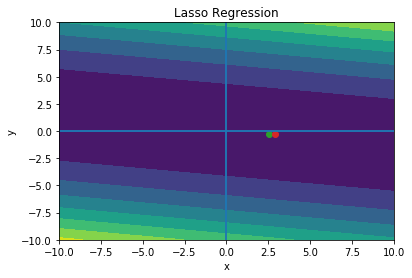

lambda value
5


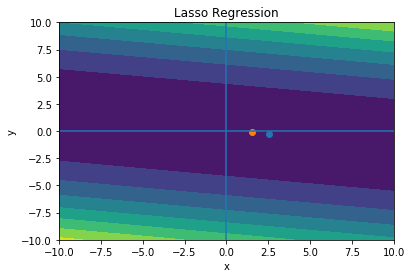

lambda value
10


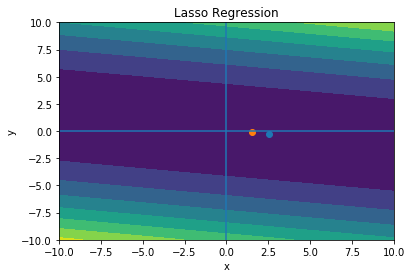

lambda value
15


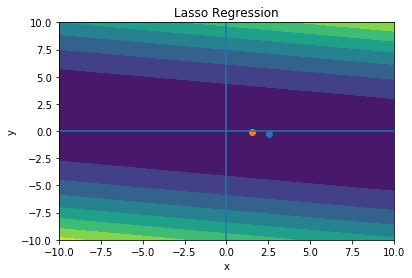

lambda value
20


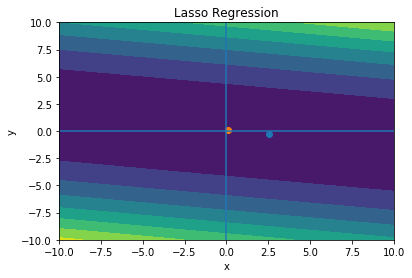

lambda value
25


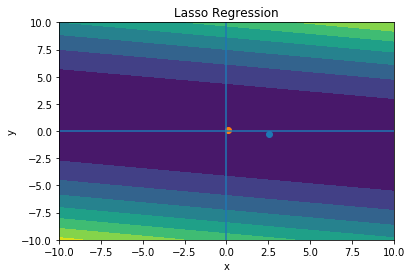

In [80]:
lambda_value = [1, 5, 10, 15, 20, 25]
d = np.empty_like(yy)

def las(l, b1, b2):
    return loss(b1, b2) + (l * reg(b1, b2))

for i in lambda_value:
    for j in range(100):
        for k in range(100):
            d[j, k] = las(i, xx[j, k], yy[j, k])
    print('lambda value')
    print(i)
    plt.contourf(xx, yy, d)
    plt.axvline(x=0)
    plt.axhline(y=0)
    plt.scatter(param2[0], param2[1])
    plt.scatter(xx[np.where(d==d.min())], yy[np.where(d==d.min())])
    plt.title('Lasso Regression')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()



### Comment your findings
As lambda values increases, the optimum get close to the original, unregularized optimum, and close to zero.